In [5]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor 
from n_dimensional_datasets import *
from plotter import *

In [15]:
start = -1
stop = 1
n_samples = 1000

error: 2.225975480329989e-18, score: 0.9999998780289736
[-1.4113710200547302e-18, -1.6307268035919976e-18, -7.666827242513996e-18, 1.4040851814556277e-18, -4.720009105785294e-18, 2.2100377083944525e-19, 1.2202044930020862e-18, 1.00076197329102e-18, 1.4241212376031597e-18, 1.5606439751625344e-18] 
 [0.9999998799269849, 0.9999998746263915, 0.9999998775237223, 0.9999998759551327, 0.9999998802840575, 0.9999998813764166, 0.9999998774885684, 0.9999998791221654, 0.9999998752216261, 0.9999998787646699]


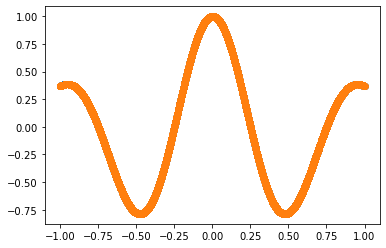

In [13]:
n_features = 1

stats = {"score": [], "error": []}
score = []
best = None

seeds = range(10)
for seed in seeds:
    X = stochastic_mesh(n_features, start, stop, n_samples).T
    y = decaying_sinewave_nd(X.T)
    tree = DecisionTreeRegressor(max_depth=50)
    tree.fit(X,y)
    score = tree.score(X, y)
    stats["error"].append(np.mean(tree.predict(X)-y))
    stats["score"].append(score)
    if best is None or np.any(score > stats["score"]):
        best = tree
print("error: {}, score: {}".format(np.mean(np.abs(stats["error"])), np.mean(np.abs(stats["score"]))))
print(stats["error"], "\n", stats["score"])

import matplotlib.pyplot as plt
if X.shape[1] == 1:
    plt.plot(X, y, 'o')
    plt.plot(X, best.predict(X), 'o')

In [16]:
n_features = 100

stats = {"score": [], "error": []}
score = []
best = None

seeds = range(10)
for seed in seeds:
    X = stochastic_mesh(n_features, start, stop, n_samples, seed=seed).T
    y = decaying_sinewave_nd(X.T)
    tree = DecisionTreeRegressor(max_depth=50)
    tree.fit(X,y)
    score = tree.score(X, y)
    stats["error"].append(np.mean(tree.predict(X)-y))
    stats["score"].append(score)
    if best is None or np.any(score > stats["score"]):
        best = tree
print("mean error: {}, mean score: {}\n\n".format(np.mean(np.abs(stats["error"])), np.mean(np.abs(stats["score"]))))
print("errors: {}\n\nscore: {}".format(stats["error"], stats["score"]))

mean error: 2.4173553143957853e-50, mean score: 0.0


errors: [9.579188720970429e-51, 8.210733189403225e-51, 1.7105694144590052e-52, -1.4967482376516296e-52, 8.894960955186827e-51, 5.345529420184391e-53, 1.0263416486754031e-51, 1.642146637880645e-50, -1.970575965456774e-49, -1.7105694144590052e-52]

score: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
